In [53]:
import pandas as pd


country_vaccinations_path = 'data/country_vaccinations.csv'
daily_covid_info_path = 'data/daily_covid_info.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)
daily_covid_info = pd.read_csv(daily_covid_info_path)

daily_covid_info.loc[daily_covid_info['Country_code'] == 'US', 'Country'] = 'United States'



In [54]:
daily_covid_info['Date_reported'] = pd.to_datetime(daily_covid_info['Date_reported'])
country_vaccinations['date'] = pd.to_datetime(country_vaccinations['date'])

merged_data = pd.merge(
    daily_covid_info,
    country_vaccinations,
    left_on=['Date_reported', 'Country'],
    right_on=['date', 'country'],
    how='inner'
)

merged_data_info = merged_data.info
merged_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,country,iso_code,...,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,2020-12-02,NO,Norway,EUR,362.0,37037,17.0,351,Norway,NOR,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
1,2020-12-03,NO,Norway,EUR,420.0,37457,2.0,353,Norway,NOR,...,NaN,0.0,0.0,0.00,0.00,NaN,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
2,2020-12-04,LV,Latvia,EUR,NaN,16975,NaN,233,Latvia,LVA,...,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Novavax, Pfizer/BioN...",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...
3,2020-12-04,NO,Norway,EUR,400.0,37857,1.0,354,Norway,NOR,...,NaN,0.0,0.0,0.00,0.00,NaN,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
4,2020-12-05,NO,Norway,EUR,382.0,38239,0.0,354,Norway,NOR,...,NaN,0.0,0.0,0.00,0.00,NaN,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73486,2022-03-29,IN,India,SEAR,1259.0,43021982,35.0,521070,India,IND,...,828229455.0,1460643.0,2580123.0,131.66,70.68,59.44,1852.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/
73487,2022-03-29,DO,Dominican Republic,AMR,30.0,577910,0.0,4375,Dominican Republic,DOM,...,5923507.0,6453.0,7249.0,141.37,65.59,54.08,662.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Public Health,https://vacunate.gob.do/
73488,2022-03-29,BR,Brazil,AMR,40161.0,29842418,313.0,658879,Brazil,BRA,...,160272858.0,1382570.0,656803.0,193.26,84.62,74.90,3069.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",State governments via coronavirusbra1.github.io,https://coronavirusbra1.github.io
73489,2022-03-29,BD,Bangladesh,SEAR,69.0,1951432,1.0,29120,Bangladesh,BGD,...,107712737.0,5183737.0,2411925.0,146.50,76.69,64.77,14503.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...


In [55]:
merged_data['New_deaths'] = merged_data['New_deaths'].fillna(0)
merged_data['New_cases'] = merged_data['New_cases'].fillna(0)
merged_data['daily_vaccinations'] = merged_data['daily_vaccinations'].fillna(0)

merged_data['Year'] = merged_data['Date_reported'].dt.year
merged_data['Month'] = merged_data['Date_reported'].dt.month
merged_data['Day'] = merged_data['Date_reported'].dt.day
merged_data['Day_of_Week'] = merged_data['Date_reported'].dt.dayofweek

model_data = merged_data[
   ['Date_reported', 'Country', 'New_deaths', 'New_cases', 'daily_vaccinations', 'Year', 'Month', 'Day', 'Day_of_Week']
]

model_data['United States' == model_data['Country']]

,Date_reported,Country,New_deaths,New_cases,daily_vaccinations,Year,Month,Day,Day_of_Week
25,2020-12-13,United States,3188.0,245839.0,0.0,2020,12,13,6
31,2020-12-14,United States,2440.0,217153.0,4579.0,2020,12,14,0
35,2020-12-15,United States,2037.0,181275.0,27175.0,2020,12,15,1
43,2020-12-16,United States,1955.0,198204.0,71420.0,2020,12,16,2
47,2020-12-17,United States,2758.0,198650.0,121718.0,2020,12,17,3
...,...,...,...,...,...,...,...,...,...
73024,2022-03-24,United States,937.0,24771.0,156889.0,2022,3,24,3
73195,2022-03-25,United States,1244.0,45160.0,149541.0,2022,3,25,4
73241,2022-03-26,United States,895.0,36077.0,143396.0,2022,3,26,5
73355,2022-03-27,United States,776.0,28714.0,137525.0,2022,3,27,6


In [56]:
representative_countries = {
    'AFR': 'South Africa',
    'AMR': 'United States',
    'EMR': 'Pakistan',
    'EUR': 'Germany',
    'SEAR': 'Japan',
    'WPR': 'Australia'
}


selected_countries = model_data[model_data['Country'].isin(representative_countries.values())]
selected_countries

,Date_reported,Country,New_deaths,New_cases,daily_vaccinations,Year,Month,Day,Day_of_Week
25,2020-12-13,United States,3188.0,245839.0,0.0,2020,12,13,6
31,2020-12-14,United States,2440.0,217153.0,4579.0,2020,12,14,0
35,2020-12-15,United States,2037.0,181275.0,27175.0,2020,12,15,1
43,2020-12-16,United States,1955.0,198204.0,71420.0,2020,12,16,2
47,2020-12-17,United States,2758.0,198650.0,121718.0,2020,12,17,3
...,...,...,...,...,...,...,...,...,...
73437,2022-03-28,Australia,31.0,0.0,68403.0,2022,3,28,0
73449,2022-03-29,Australia,28.0,0.0,65688.0,2022,3,29,1
73456,2022-03-29,South Africa,4.0,581.0,66081.0,2022,3,29,1
73467,2022-03-29,Germany,0.0,0.0,45378.0,2022,3,29,1


In [59]:
selected_countries.to_csv('data_output/selected_countries.csv', index=False)

In [49]:
selected_countries_grouped = selected_countries.groupby(
    ['Country', 'Date_reported']
).agg(
    {
        'New_deaths': 'sum',
        'New_cases': 'sum',
        'daily_vaccinations': 'sum'
    }
).reset_index()
selected_countries_grouped

,Country,Date_reported,New_deaths,New_cases,daily_vaccinations
0,Germany,2020-12-27,5728.0,138828.0,0.0
1,Germany,2020-12-28,0.0,0.0,18101.0
2,Germany,2020-12-29,0.0,0.0,34403.0
3,Germany,2020-12-30,0.0,0.0,44336.0
4,Germany,2020-12-31,0.0,0.0,45756.0
...,...,...,...,...,...
924,United States,2022-03-24,937.0,24771.0,156889.0
925,United States,2022-03-25,1244.0,45160.0,149541.0
926,United States,2022-03-26,895.0,36077.0,143396.0
927,United States,2022-03-27,776.0,28714.0,137525.0


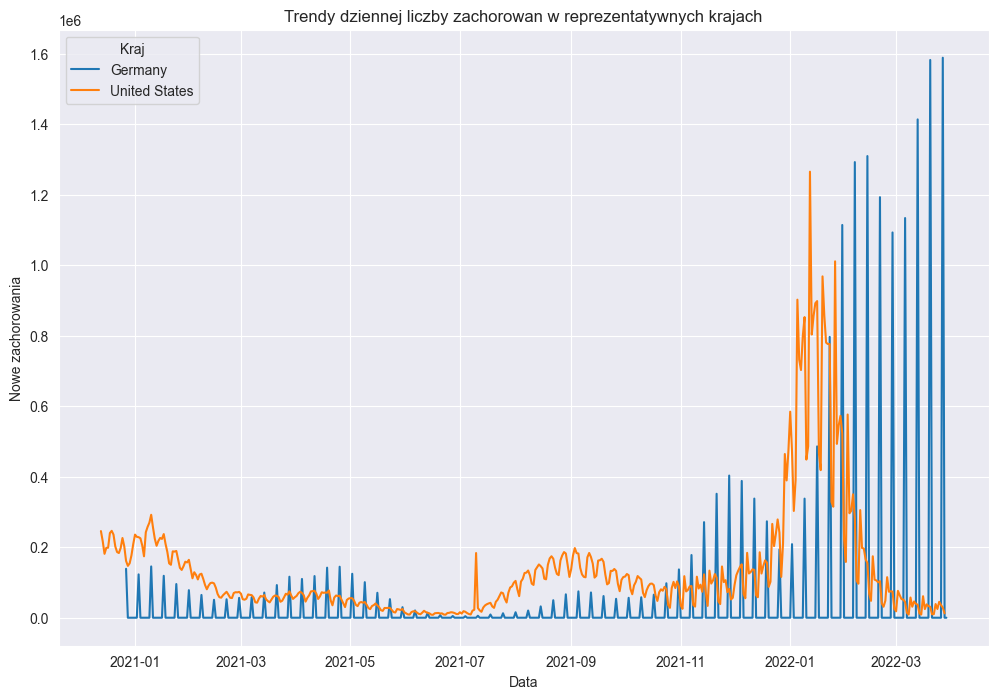

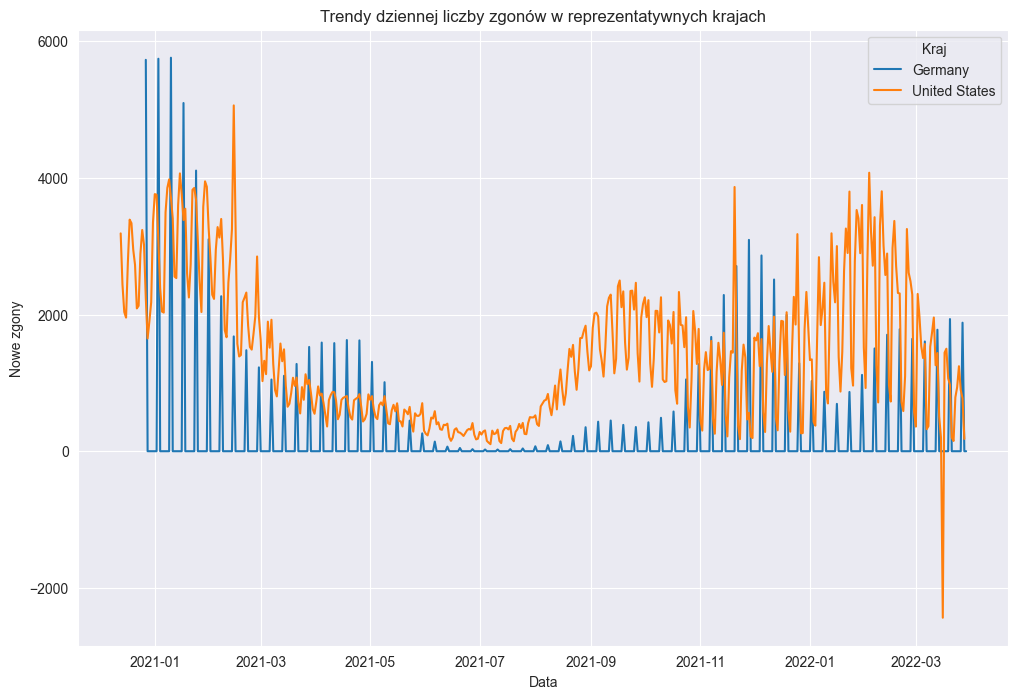

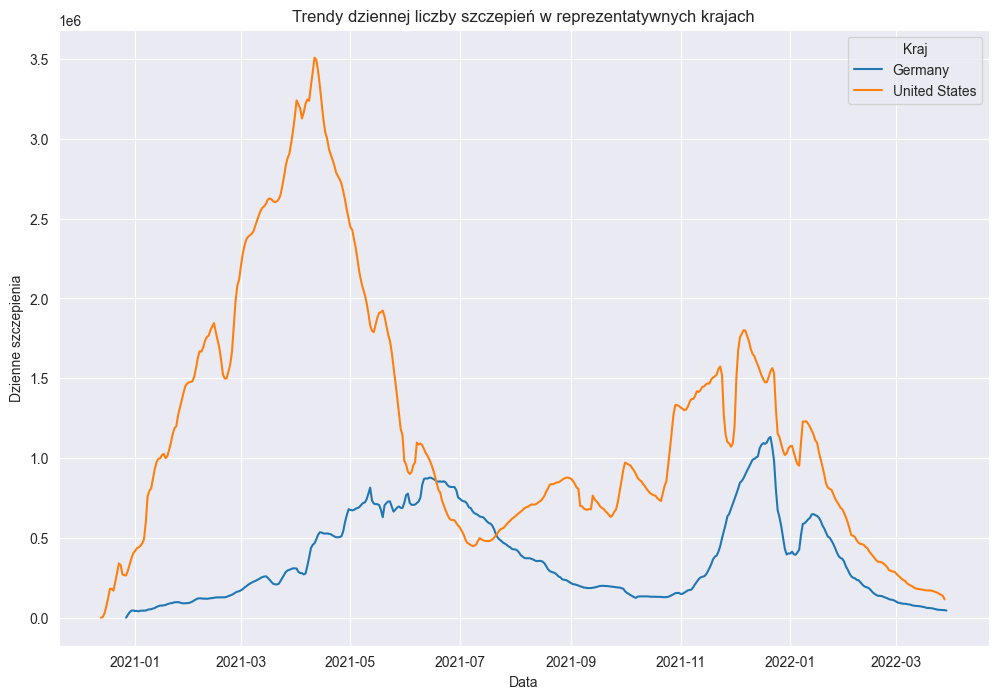

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=selected_countries_grouped,
    x='Date_reported',
    y='New_cases',
    hue='Country'
)
plt.title('Trendy dziennej liczby zachorowan w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Nowe zachorowania')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=selected_countries_grouped,
    x='Date_reported',
    y='New_deaths',
    hue='Country'
)
plt.title('Trendy dziennej liczby zgonów w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Nowe zgony')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=selected_countries_grouped,
    x='Date_reported',
    y='daily_vaccinations',
    hue='Country'
)
plt.title('Trendy dziennej liczby szczepień w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Dzienne szczepienia')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

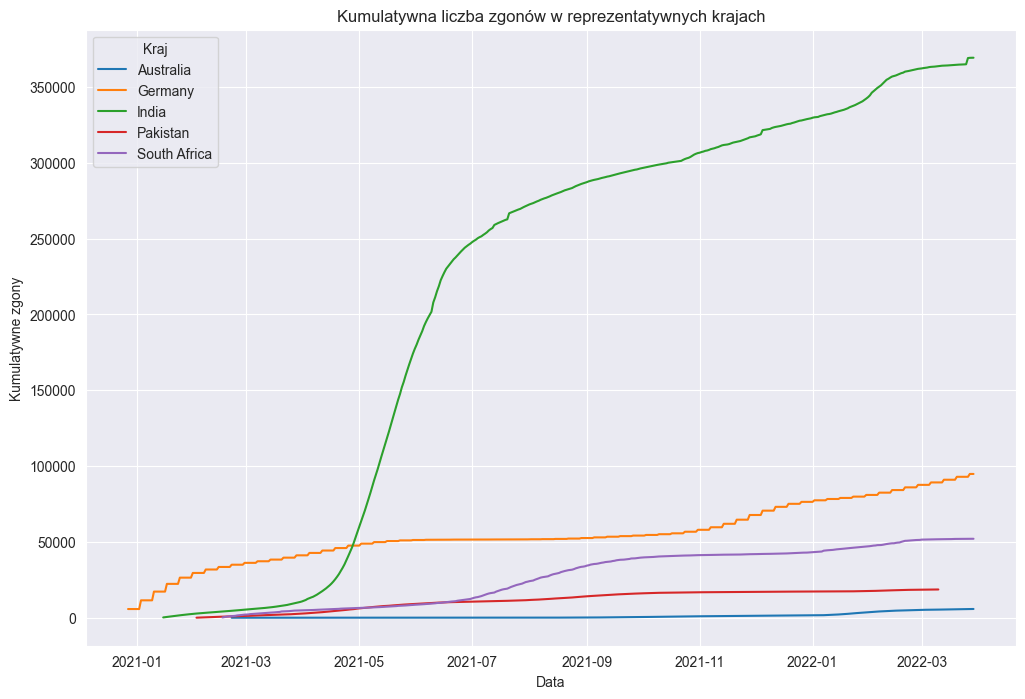

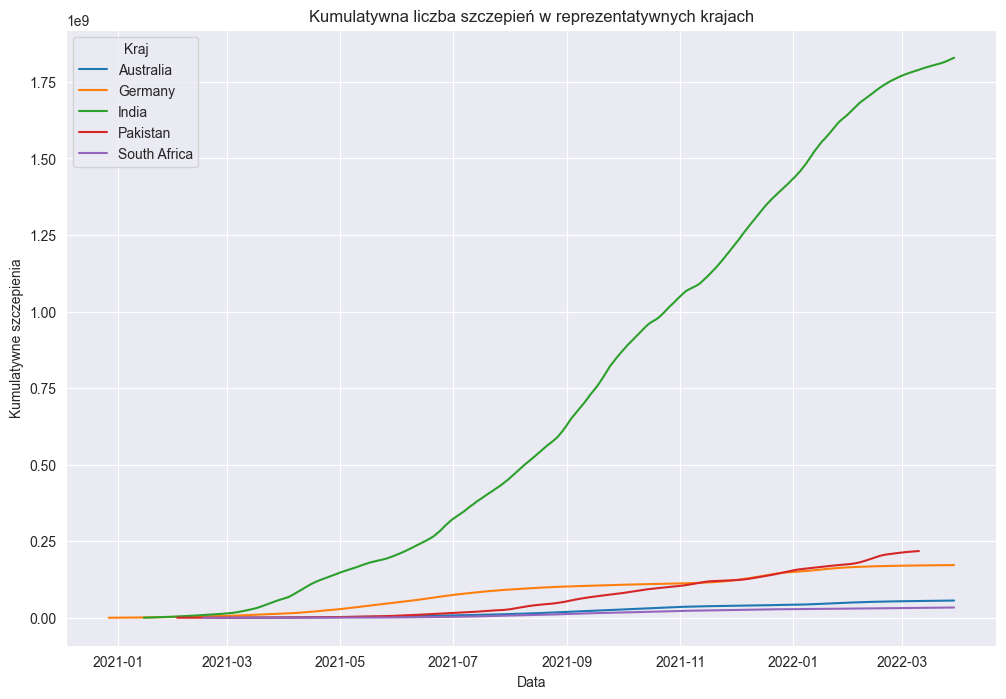

In [16]:
# Calculate cumulative sums for each country
selected_countries_grouped = selected_countries.groupby(['Country', 'Date_reported']).agg({
    'New_deaths': 'sum',
    'daily_vaccinations': 'sum'
}).groupby('Country').cumsum().reset_index()

# Plot cumulative trends for new deaths
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=selected_countries_grouped,
    x='Date_reported',
    y='New_deaths',
    hue='Country'
)
plt.title('Kumulatywna liczba zgonów w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Kumulatywne zgony')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

# Plot cumulative trends for vaccinations
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=selected_countries_grouped,
    x='Date_reported',
    y='daily_vaccinations',
    hue='Country'
)
plt.title('Kumulatywna liczba szczepień w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Kumulatywne szczepienia')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for regression
regression_data = selected_countries[
    ['New_deaths', 'daily_vaccinations', 'New_cases']
].dropna()

# Define dependent (y) and independent variables (X)
X = regression_data[['daily_vaccinations', 'New_cases']]
y = regression_data['New_deaths']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get coefficients
coefficients = model.coef_
intercept = model.intercept_

mse, r2, coefficients, intercept

(923545.8526122957,
 0.167134779657528,
 array([153.21201692, 613.42538115]),
 834.1160831124496)